In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('Property.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [5]:
missing_values = ["n/a", "na", "--"]

In [9]:
df = pd.read_csv("Property.csv", na_values = missing_values)

In [11]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [15]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1
    
#Untuk Menangani Unexpected Missing Values

In [16]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [17]:
df.isnull().values.any()

True

In [18]:
df.isnull().sum().sum()

12

In [19]:
df['ST_NUM'].fillna(125, inplace=True)

In [20]:
df.loc[5, 'ST_NUM'] = 100

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,100.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [23]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [24]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,100.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [27]:
%matplotlib inline


In [41]:
data = pd.ExcelFile('obes.xlsx', engine='openpyxl')

In [42]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [43]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [44]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [45]:
data_age.rename(columns={u'Unnamed: 0' : u'Year'}, inplace=True)

In [46]:
data_age.dropna(inplace=True)

In [47]:
data_age.set_index('Year', inplace=True)

In [48]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<Axes: xlabel='Year'>

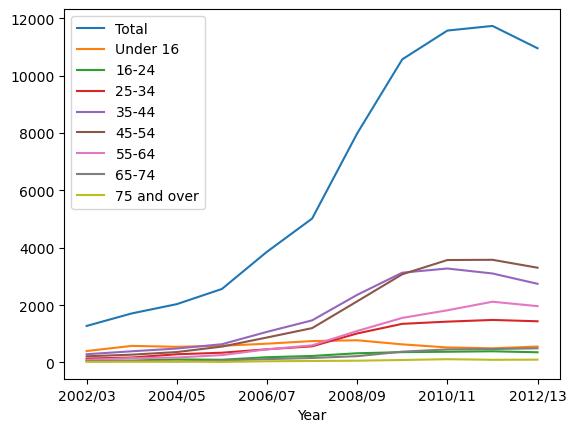

In [49]:
data_age.plot()

In [50]:
data_age_minus_total = data_age.drop('Total', axis=1)

<Axes: xlabel='Year'>

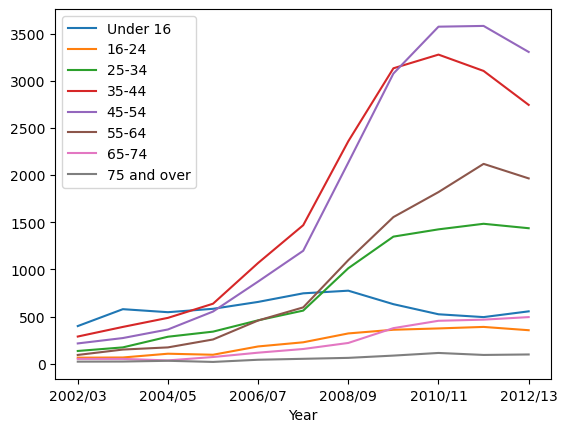

In [51]:
data_age_minus_total.plot()

<Axes: xlabel='Year'>

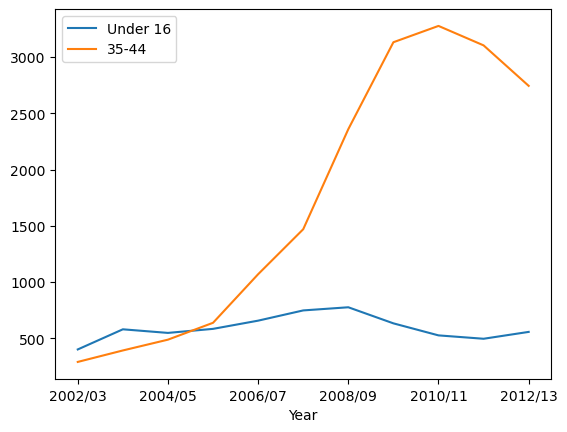

In [52]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

In [11]:
from datetime import datetime

In [3]:
date_rng= pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [56]:
date_rng.shape

(169,)

In [31]:
df = pd.DataFrame(date_rng, columns=['date'])

In [32]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [33]:
df.head()

,date,data
0,2020-01-01 00:00:00,86
1,2020-01-01 01:00:00,97
2,2020-01-01 02:00:00,14
3,2020-01-01 03:00:00,66
4,2020-01-01 04:00:00,24


In [6]:
string_date_rng = [str(x) for x in date_rng]

In [ ]:
string_date_rng


In [7]:
timestamp_date_rng = pd.to_datetime(string_date_rng,infer_datetime_format=True)

In [8]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [9]:
string_date_rng_2= ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [12]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [67]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [13]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [38]:
df

,date,data
0,2020-01-01 00:00:00,86
1,2020-01-01 01:00:00,97
2,2020-01-01 02:00:00,14
3,2020-01-01 03:00:00,66
4,2020-01-01 04:00:00,24
...,...,...
164,2020-01-07 20:00:00,6
165,2020-01-07 21:00:00,64
166,2020-01-07 22:00:00,81
167,2020-01-07 23:00:00,15


In [52]:
df['2020-01-01']

KeyError: '2020-01-01'

In [35]:
df.resample('D', on='date').mean()

,data
date,
2020-01-01,51.958333
2020-01-02,61.208333
2020-01-03,48.875000
2020-01-04,53.833333
2020-01-05,47.583333
2020-01-06,39.958333
2020-01-07,41.625000
2020-01-08,54.000000


In [60]:
df.head()

,date,data,rolling_sum
0,2020-01-01 00:00:00,86,NaN
1,2020-01-01 01:00:00,97,NaN
2,2020-01-01 02:00:00,14,197.0
3,2020-01-01 03:00:00,66,177.0
4,2020-01-01 04:00:00,24,104.0


In [61]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [62]:
df.head()

,date,data,rolling_sum,rolling_sum_backfilled
0,2020-01-01 00:00:00,86,NaN,197.0
1,2020-01-01 01:00:00,97,NaN,197.0
2,2020-01-01 02:00:00,14,197.0,197.0
3,2020-01-01 03:00:00,66,177.0,177.0
4,2020-01-01 04:00:00,24,104.0,104.0


In [99]:
opsd_daily = pd.read_csv('opsd_daily.CSV', parse_dates=['Date'])

In [64]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [81]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [82]:
opsd_daily.head()

,level_0,index,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
1970-01-01 00:00:00.000000000,0,0,2006-01-01,1069.184,NaN,NaN,NaN,1970,1,3
1970-01-01 00:00:00.000000001,1,1,2006-01-02,1380.521,NaN,NaN,NaN,1970,1,3
1970-01-01 00:00:00.000000002,2,2,2006-01-03,1442.533,NaN,NaN,NaN,1970,1,3
1970-01-01 00:00:00.000000003,3,3,2006-01-04,1457.217,NaN,NaN,NaN,1970,1,3
1970-01-01 00:00:00.000000004,4,4,2006-01-05,1477.131,NaN,NaN,NaN,1970,1,3


In [85]:
opsd_daily.set_index(['Date'], inplace=True)

In [89]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           1970.000
Month             1.000
Weekday           3.000
Name: 2017-08-10, dtype: float64

In [90]:
opsd_daily.loc['2014-01-20' : '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,1970,1,3
2014-01-21,1624.806,15.643,5.835,21.478,1970,1,3
2014-01-22,1625.155,60.259,11.992,72.251,1970,1,3


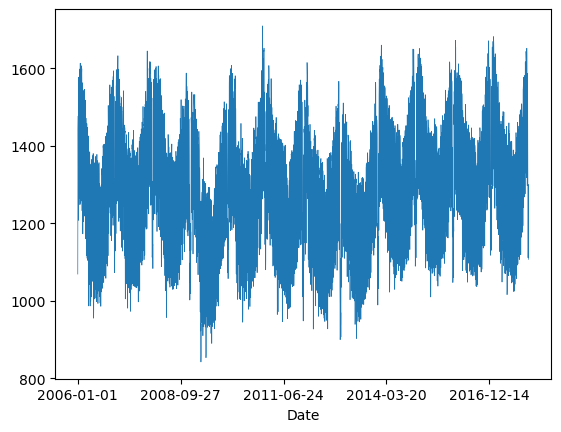

In [93]:
opsd_daily['Consumption'].plot(linewidth=0.5);

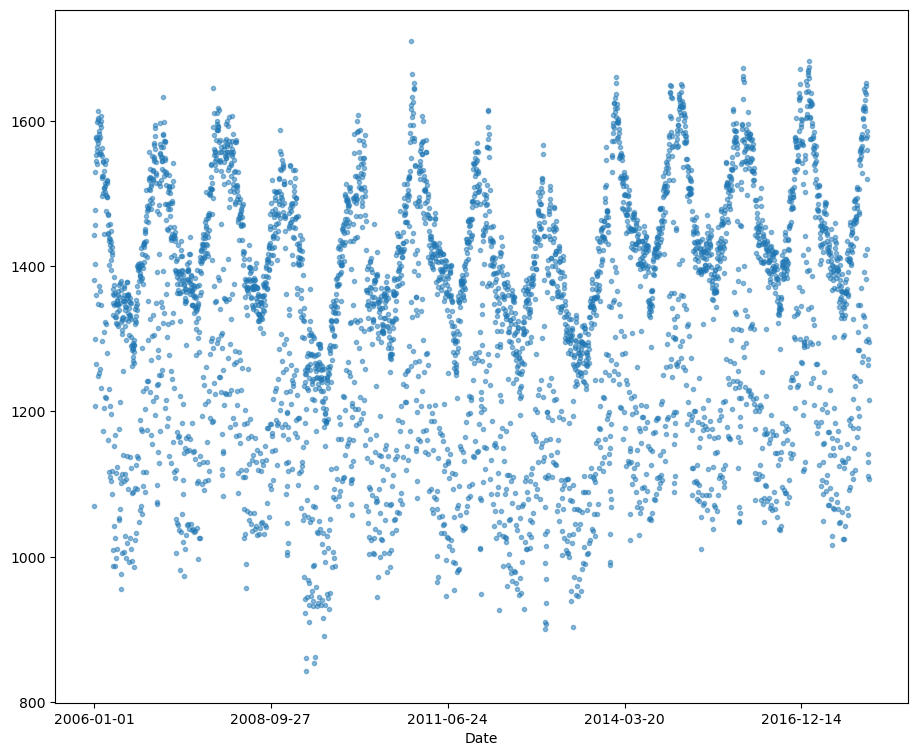

In [94]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None',
figsize=(11, 9));

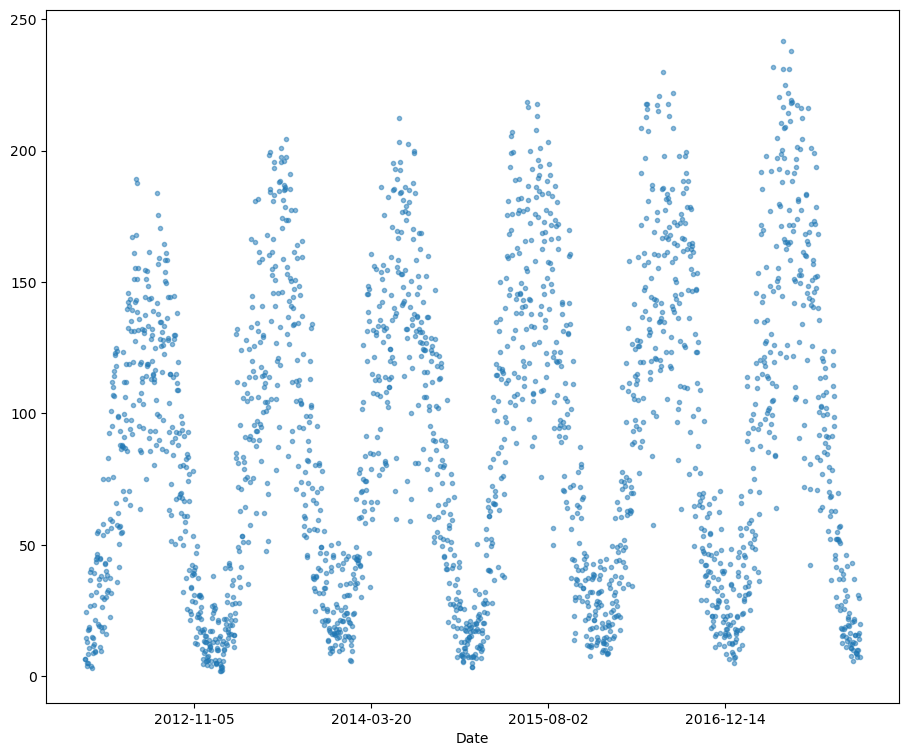

In [95]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

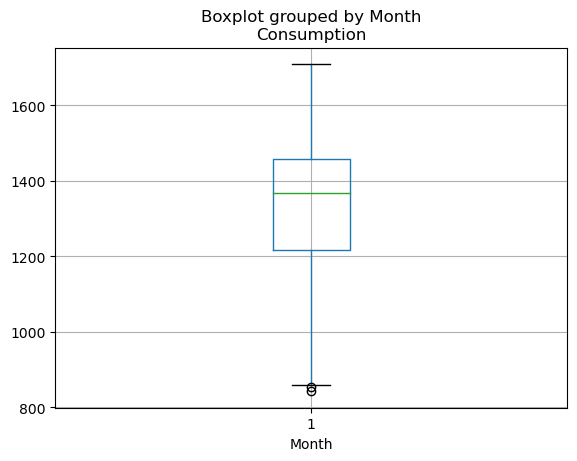

In [96]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

In [101]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'], errors='coerce')

In [104]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']


In [107]:
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'